Found 1325 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.7227 - loss: 0.6168

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7234 - loss: 0.6158 - val_accuracy: 0.7606 - val_loss: 0.5178
Epoch 2/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7762 - loss: 0.4736 - val_accuracy: 0.9061 - val_loss: 0.1893
Epoch 3/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 992ms/step - accuracy: 0.9026 - loss: 0.2421 - val_accuracy: 0.9788 - val_loss: 0.0492


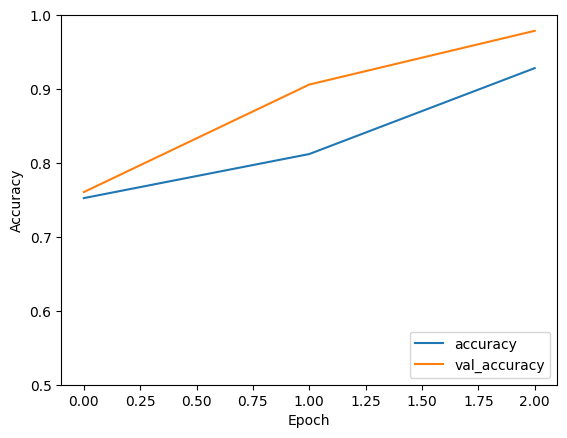

In [10]:
import tensorflow
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.models import load_model

# 하이퍼파라미터
img_size = (128, 128)
batch_size = 32
epochs = 10

# 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20%는 검증용
)


train_generator = train_datagen.flow_from_directory(
    '/content/train_img',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # 학습용
)

val_generator = train_datagen.flow_from_directory(
    '/content/train_img',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # 검증용
)


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary: real vs fake
])

# print('클래스',train_generator.class_indices)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(train_generator, epochs=3, validation_data = val_generator)

model.save('face_recognition_model.h5')


# 정확도 시각화
plt.plot(history.history['accuracy'], label='accuracy') #훈련데이터 정확도
plt.plot(history.history['val_accuracy'], label='val_accuracy') #검증데이터 정확도
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()







Found 2408 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.9377 - loss: 0.1891
Test Accuracy: 0.9028
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


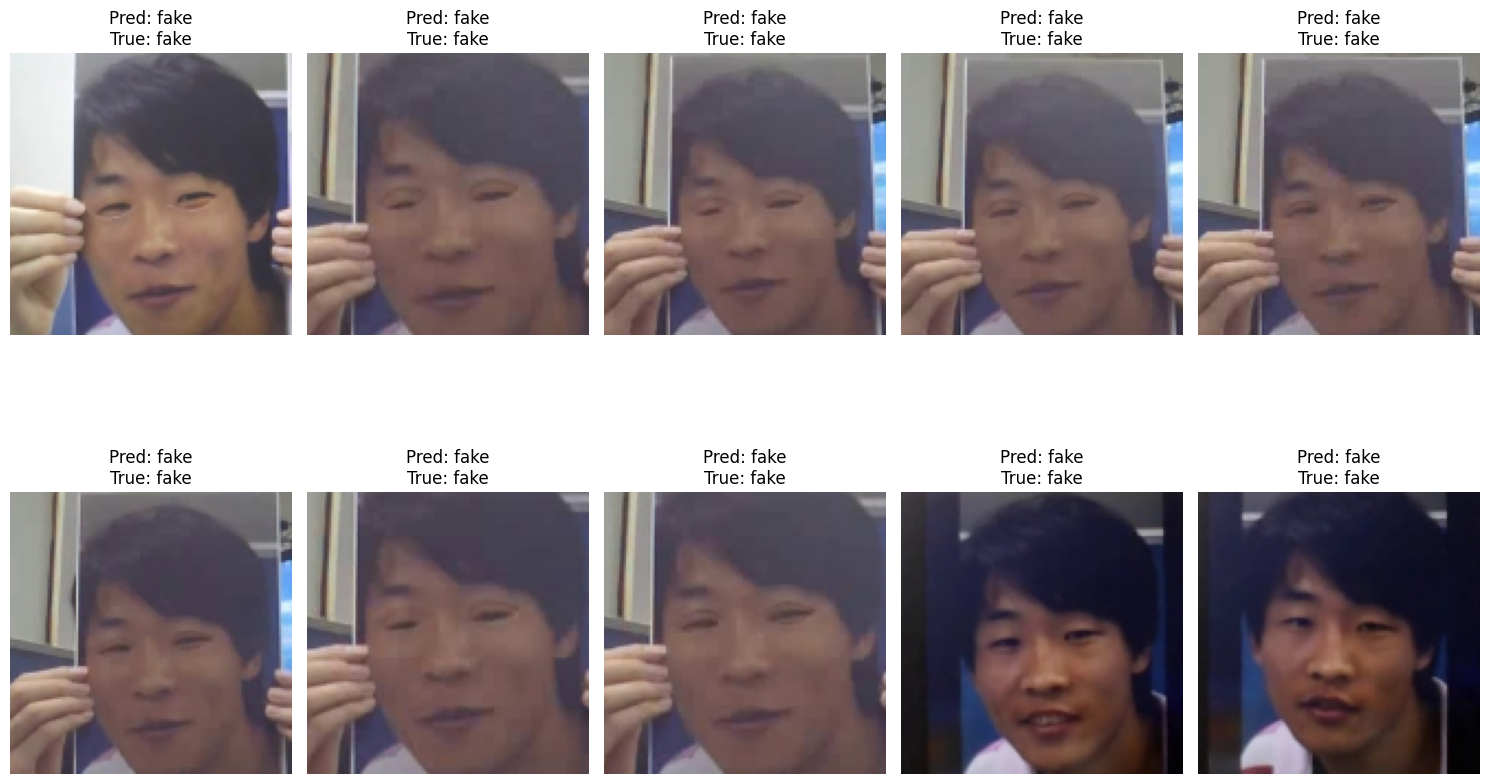

In [18]:
import tensorflow
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import random




my_model = load_model('face_recognition_model.h5')
# my_model.summary()

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/test_img',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # 정확도 확인만 할 거니까 섞지 않음
)

loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy:.4f}')

# 예측 수행
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# 실제 라벨
true_labels = test_generator.classes
class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# # 이미지 배치 (shuffle=False여야 순서 일치)
# images, _ = next(test_generator[7])

# plt.figure(figsize=(15, 10))
# for i in range(10):
#     img = images[i]
#     true = index_to_class[true_labels[i]]
#     pred = index_to_class[pred_labels[i]]

#     plt.subplot(2, 5, i+1)
#     plt.imshow(img)
#     plt.title(f'Pred: {pred} : i = {i}\nTrue: {true} : i = {i}')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

batch_index = random.randint(0, len(test_generator) - 1)  # 랜덤 배치
images, labels = test_generator[batch_index]              # 해당 배치 이미지 불러오기

pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(15, 10))
for i in range(10):
    img = images[i]
    true = index_to_class[int(labels[i])]
    pred = index_to_class[int(pred_labels[i])]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'Pred: {pred}\nTrue: {true}')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [9]:
#데이터 전처리

import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import os, shutil

# Download latest version
path = kagglehub.dataset_download("minhnh2107/casiafasd")

print("path : {}", path)

train_dir = os.path.join(path, 'train_img', 'train_img', 'color')
test_dir = os.path.join(path, 'test_img', 'test_img', 'color')

def organize_images_by_label(base_path):

    real_path = os.path.join('/content/train_img/real')
    fake_path = os.path.join('/content/train_img/fake')

    os.makedirs(real_path, exist_ok=True)
    os.makedirs(fake_path, exist_ok=True)

    for fname in os.listdir(base_path):
        if 'real' in fname.lower():
            shutil.copy(os.path.join(base_path, fname), os.path.join(real_path, fname))
        elif 'fake' in fname.lower():
            shutil.copy(os.path.join(base_path, fname), os.path.join(fake_path, fname))

# 학습 이미지 분류
organize_images_by_label(train_dir)

# # 테스트 이미지 분류
# organize_images_by_label(path)


path : {} /kaggle/input/casiafasd


In [4]:
def predict_liveness(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return "Real" if prediction[0][0] > 0.5 else "Fake"

# 테스트
print(predict_liveness("test_images/photo.jpg"))


NameError: name 'cv2' is not defined

In [5]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kkkkksoeun","key":"ab6c1b985d4a97fbf17d49b7d344e236"}'}

In [6]:

ls -1ha kaggle.json


kaggle.json


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
import shutil

# shutil.rmtree('/content/train_img/real')

In [28]:
!rm -rf /content/train_img/.ipynb_checkpoints
!rm -rf /content/test_img/.ipynb_checkpoints
